# The py format file format for the web scraping assignment link
https://drive.google.com/file/d/1KEezIWHqidDS2mXBmjCCGUl_dTqTfvxW/view?usp=sharing

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install wordcloud

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
import numpy as np
import csv
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page = requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup = BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
# Initialize an empty list to store complete movie URLs
movies_link_list = []

# Set the main website URL
main_website_url = r'https://www.justwatch.com'

# Find all <a> tags with the specified class
movies_link = soup.find_all('a', class_="title-list-grid__item--link")

# Iterate through each <a> tag in the list
for link in movies_link:
    # Extract the value of the href attribute (movie URL)
    movie_url = link.get('href')

    # Combine the main website URL with the movie URL and append to the list
    movies_link_list.append(main_website_url + movie_url)

# Print the list of complete movie URLs
print(movies_link_list)

['https://www.justwatch.com/in/movie/laapataa-ladies', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/family-star', 'https://www.justwatch.com/in/movie/aavesham-2024', 'https://www.justwatch.com/in/movie/black-magic-2024', 'https://www.justwatch.com/in/movie/article-370', 'https://www.justwatch.com/in/movie/madgaon-express', 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire', 'https://www.justwatch.com/in/movie/yodha-2022', 'https://www.justwatch.com/in/movie/premalu', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/kung-fu-panda-4', 'https://www.justwatch.com/in/movie/monkey-man', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatch.com/in/mo

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
# Initialize an empty list to store movie titles
movie_title_list = []

# Loop through each link in the movies_link_list
for link in movies_link_list:
    # Assign the current link to a variable
    url_from_list = link

    # Send a GET request to the URL
    page = requests.get(url_from_list)

    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the <h1> tag in the parsed HTML
    h1_tag = soup.find('h1')

    # Check if <h1> tag is found
    if h1_tag:
        # Extract the text of the <h1> tag and remove leading/trailing spaces
        movie_title = h1_tag.text.strip()
        # Append the extracted movie title to the movie_title_list
        movie_title_list.append(movie_title)
    else:
        # If <h1> tag is not found, append a message indicating the title was not found
        movie_title_list.append(f"Movie title not found for {url_from_list}")

    # Pause the execution for 3 seconds before processing the next link
    time.sleep(3)

# Print the list of extracted movie titles
print(movie_title_list)

['Laapataa Ladies', 'Manjummel Boys', 'Family Star', 'Aavesham', 'Shaitaan', 'Article 370', 'Madgaon Express', 'Godzilla x Kong: The New Empire', 'Yodha', 'Premalu', 'Crew', 'Dune: Part Two', 'Kung Fu Panda 4', 'Monkey Man', 'Oppenheimer', 'Teri Baaton Mein Aisa Uljha Jiya', 'Hanu-Man', 'Anyone But You', 'Tillu Square', 'The Beekeeper', 'Hereditary', 'Godzilla Minus One', 'Dune', 'The Idea of You', 'Animal', 'Amar Singh Chamkila', '777 Charlie', '12th Fail', 'Anatomy of a Fall', 'Zara Hatke Zara Bachke', 'Madame Web', 'Salaar', 'Rise of the Planet of the Apes', 'DJ Tillu', 'Crakk: Jeetega... Toh Jiyegaa', 'Sam Bahadur', '365 Days', 'The Raid', 'Challengers', "Harry Potter and the Philosopher's Stone", 'Bramayugam', 'Aquaman and the Lost Kingdom', 'Romeo', 'The Fall Guy', 'Poor Things', 'Fighter', 'Mad Max: Fury Road', 'Wild Tales', 'Kung Fu Panda', 'The Goat Life', 'Bade Miyan Chote Miyan', 'Late Night with the Devil', 'Exhuma', 'Maidaan', 'Veppam Kulir Mazhai', 'Migration', 'Kingdom o

## **Scrapping release Year**

In [ ]:
# Write Your Code here
# Initialize an empty list to store movie release year
release_year_list = []

# Iterate through each movie link in the list (list_of_movies_links)
for link in movies_link_list:
    # Set the current URL
    url_from_list = link

    # Sending an HTTP GET request to the URL
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the movie release year
    release_span = soup.find('span', class_='text-muted')

    # Check if the release year is found
    if release_span:
        release_year = release_span.text.strip('() ').replace('(', '').replace(')', '')  # Remove leading/trailing parentheses and whitespace
        release_year_list.append(release_year)
    else:
        release_year_list.append(f"Release year not found for {link}")

    # Pause the execution for 3 seconds before processing the next link
    time.sleep(3)

# Print the list of extracted release year
print(release_year_list)

['2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2023', '2024', '2024', '2023', '2024', '2024', '2018', '2023', '2021', '2024', '2023', '2024', '2022', '2023', '2023', '2023', '2024', '2023', '2011', '2022', '2024', '2023', '2020', '2012', '2024', '2001', '2024', '2023', '2024', '2024', '2023', '2024', '2015', '2014', '2008', '2024', '2024', '2024', '2024', '2022', '2024', '2023', '2024', '2024', '2021', '2019', '2024', '2001', '2023', '2024', '2024', '2024', '2024', '2023', '2017', '2024', '2023', '2023', '2024', '2021', '2024', '2013', '2014', '2024', '2024', '2023', '2023', '2015', '2022', '2024', '2024', '2023', '2024', '2024', '2024', '2024', '2014', '2024', '2024', '2023', '2019', '2023', '2021', '2023', '2018', '2023']


## **Scrapping Genres**

In [ ]:
# Write Your Code here
# Initialize an empty list to store genres
genres_list = []

# Loop through each link in the movies_link_list
for link in movies_link_list:
    # Get the URL from the current link in the list
    url_from_list = link

    # Send a GET request to the URL
    page = requests.get(url_from_list)

    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the genre heading in the HTML with class 'detail-infos__subheading' and text 'Genres'
    genre_heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    # Check if genre heading is found
    if genre_heading:
        # Find the next div with class 'detail-infos__value' after the heading
        genre_div = genre_heading.find_next('div', class_='detail-infos__value')

        # Check if genre_div is found
        if genre_div:
            # Get the text inside the div and strip any leading/trailing whitespace
            genres = genre_div.get_text(strip=True)
            # Append the genres to the genres_list
            genres_list.append(genres)
        else:
            # If genre_div is not found, append a message indicating genres were not found for the URL
            genres_list.append(f"Genres not found for {url}")
    else:
        # If genre_heading is not found, append a message indicating genres were not found for the URL
        genres_list.append(f"Genres not found for {url}")

    # Pause execution for 3 seconds
    time.sleep(3)

# Print the list of genres
print(genres_list)

['Comedy, Drama', 'Mystery & Thriller, Action & Adventure, Drama', 'Action & Adventure, Drama, Romance', 'Action & Adventure, Comedy', 'Mystery & Thriller, Horror, Drama', 'Mystery & Thriller, Action & Adventure, Drama', 'Drama, Comedy', 'Science-Fiction, Mystery & Thriller, Action & Adventure, Fantasy', 'Mystery & Thriller, Drama, Action & Adventure', 'Comedy, Romance', 'Genres not found for https://www.justwatch.com/in/movies?release_year_from=2000', 'Science-Fiction, Action & Adventure, Drama', 'Comedy, Kids & Family, Fantasy, Animation, Action & Adventure', 'Action & Adventure, Mystery & Thriller', 'Drama, History', 'Comedy, Drama, Romance, Science-Fiction', 'Science-Fiction, Fantasy, Action & Adventure, Comedy', 'Genres not found for https://www.justwatch.com/in/movies?release_year_from=2000', 'Comedy, Crime, Drama, Mystery & Thriller', 'Action & Adventure, Mystery & Thriller, Drama', 'Horror, Mystery & Thriller, Drama', 'Horror, Action & Adventure, Science-Fiction, Drama', 'Scien

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
# Initialize an empty list to store IMDb ratings
imdb_rating_list = []

# Loop through each movie link in the movies_link_list
for link in movies_link_list:
    url_from_list = link

    # Send a GET request to the movie URL
    page = requests.get(url_from_list)

    # Parse the HTML content of the page
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find all span elements on the page
    rating_spans = soup.find_all('span', class_='')

    # Initialize IMDb rating variable
    imdb_rating = None

    # Loop through the rating spans to find the IMDb rating
    for span in rating_spans:
        # Check if the previous sibling of the span has an img with the alt text "IMDB"
        previous_sibling = span.find_previous_sibling('img')
        if previous_sibling and 'IMDB' in previous_sibling['alt']:
            # Use regex to extract the numeric IMDb rating
            match = re.search(r'\d+\.\d+', span.get_text(strip=True))
            if match:
                imdb_rating = match.group(0)
                break

    # Append the IMDb rating to the list, or a not found message if no rating was found
    if imdb_rating:
        imdb_rating_list.append(imdb_rating)
    else:
        imdb_rating_list.append(f"IMDb rating not found for {url_from_list}")

    # Pause for 3 seconds before making the next request
    time.sleep(3)

# Print the list of IMDb ratings
print(imdb_rating_list)

['8.5', '8.4', '5.1', '8.0', 'IMDb rating not found for https://www.justwatch.com/in/movie/black-magic-2024', '8.0', '7.3', '6.3', '5.7', '7.9', '6.4', 'IMDb rating not found for https://www.justwatch.com/in/movie/dune-part-two', '6.3', 'IMDb rating not found for https://www.justwatch.com/in/movie/monkey-man', '8.3', '6.3', '7.9', '6.1', 'IMDb rating not found for https://www.justwatch.com/in/movie/tillu-square', '6.4', '7.3', '8.0', '8.0', '6.4', 'IMDb rating not found for https://www.justwatch.com/in/movie/animal-2022', '8.0', '8.7', '8.9', '7.7', '6.3', '3.9', 'IMDb rating not found for https://www.justwatch.com/in/movie/salaar', '7.6', '7.2', '4.9', '7.7', '3.3', '7.6', 'IMDb rating not found for https://www.justwatch.com/in/movie/challengers', '7.6', '7.9', '5.6', 'IMDb rating not found for https://www.justwatch.com/in/movie/romeo-2024', '7.2', 'IMDb rating not found for https://www.justwatch.com/in/movie/poor-things', '6.2', '8.1', '8.1', '7.6', '8.6', '5.0', '7.1', 'IMDb rating 

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
# Initialize an empty list to store the durations
duration_list = []

# Iterate through each movie link in the list (movies_link_list)
for link in movies_link_list:
    # Set the current URL to the movie link
    url_from_list = link

    # Sending an HTTP GET request to the URL to fetch the webpage content
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the h3 element containing the text 'Runtime'
    runtime_heading = soup.find('h3', string='Runtime')

    # Initialize runtime as None in case the element is not found
    runtime = None

    # Check if the 'Runtime' heading is found
    if runtime_heading:
        # Find the next sibling div containing the runtime information
        runtime_div = runtime_heading.find_next_sibling('div')

        # Check if the sibling div is found
        if runtime_div:
            # Extract the text value of the runtime
            runtime = runtime_div.get_text(strip=True)

    # If runtime information is found, append it to the duration list
    if runtime:
        duration_list.append(runtime)
    else:
        # If runtime information is not found, append a not found message
        duration_list.append(f"Duration not found for {url_from_list}")

    # Pause for 3 seconds before making the next request to avoid overloading the server
    time.sleep(3)

# Print the final list of durations
print(duration_list)

['2h 2min', '2h 15min', '2h 39min', '2h 38min', '2h 12min', 'Duration not found for https://www.justwatch.com/in/movie/article-370', '2h 23min', '1h 55min', '2h 10min', '2h 36min', '1h 58min', '2h 47min', 'Duration not found for https://www.justwatch.com/in/movie/kung-fu-panda-4', '2h 1min', '3h 0min', '2h 21min', '2h 39min', '1h 44min', '2h 17min', 'Duration not found for https://www.justwatch.com/in/movie/the-beekeeper-2024', '2h 7min', '2h 5min', '2h 35min', '1h 56min', '3h 21min', '2h 25min', 'Duration not found for https://www.justwatch.com/in/movie/777-charlie', '2h 27min', '2h 32min', '2h 20min', '1h 56min', '2h 55min', 'Duration not found for https://www.justwatch.com/in/movie/rise-of-the-planet-of-the-apes', '2h 1min', '2h 34min', '2h 30min', '1h 54min', '1h 41min', '2h 12min', 'Duration not found for https://www.justwatch.com/in/movie/harry-potter-and-the-philosophers-stone', '2h 19min', '2h 4min', '2h 26min', '2h 6min', '2h 22min', 'Duration not found for https://www.justwat

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
# Initialize an empty list to store age ratings
age_rating_list = []

# Iterate through each movie link in the list (movies_link_list)
for link in movies_link_list:
    # Set the current URL
    url_from_list = link

    # Sending an HTTP GET request to the URL
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the h3 element containing the text 'Age rating'
    age_rating_heading = soup.find('h3', string='Age rating')

    # Initialize age_rating as None in case the element is not found
    age_rating = None

    # If the age rating heading is found, proceed to find the age rating value
    if age_rating_heading:
        # Find the next sibling div containing the age rating information
        age_rating_div = age_rating_heading.find_next_sibling('div')

        # If the sibling div is found, extract the text value of the age rating
        if age_rating_div:
            age_rating = age_rating_div.get_text(strip=True)

    # If age rating is found, add it to the list and print it
    if age_rating:
        age_rating_list.append(age_rating)
    else:
        # If age rating is not found, add a message to the list
        age_rating_list.append(f"Age rating not found for {url_from_list}")

    # Pause for 3 seconds before making the next request
    time.sleep(3)

# Print the list of age ratings
print(age_rating_list)

['UA', 'UA', 'Age rating not found for https://www.justwatch.com/in/movie/family-star', 'Age rating not found for https://www.justwatch.com/in/movie/aavesham-2024', 'UA', 'Age rating not found for https://www.justwatch.com/in/movie/article-370', 'UA', 'UA', 'UA', 'U', 'UA', 'Age rating not found for https://www.justwatch.com/in/movie/dune-part-two', 'Age rating not found for https://www.justwatch.com/in/movie/kung-fu-panda-4', 'Age rating not found for https://www.justwatch.com/in/movie/monkey-man', 'UA', 'Age rating not found for https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'UA', 'A', 'Age rating not found for https://www.justwatch.com/in/movie/tillu-square', 'Age rating not found for https://www.justwatch.com/in/movie/the-beekeeper-2024', 'A', 'Age rating not found for https://www.justwatch.com/in/movie/godzilla-minus-one', 'UA', 'Age rating not found for https://www.justwatch.com/in/movie/the-idea-of-you', 'A', 'Age rating not found for https://www.ju

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store production countries
production_country_list = []

# Iterate through each movie link in the list (movies_link_list)
for link in movies_link_list:
    # Set the current URL
    url_from_list = link

    # Sending an HTTP GET request to the URL
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find all div elements with class 'detail-infos'
    detail_infos_divs = soup.find_all('div', class_='detail-infos')

    # Initialize production_country as None
    production_country = None

    # Loop through each detail-infos div to find the production country
    for div in detail_infos_divs:
        # Find the h3 element inside the detail-infos div
        h3_element = div.find('h3')

        # Check if the h3 element exists and contains the text 'Production country'
        if h3_element and 'Production country' in h3_element.get_text():
            # Find the div containing the production country information
            production_country_div = div.find('div', class_='detail-infos__value')

            # Check if the production country div is found
            if production_country_div:
                # Extract the text value of the production country
                production_country = production_country_div.get_text(strip=True)
                break  # Stop searching if production country is found

    # Add the production country to the list or add a message if not found
    if production_country:
        production_country_list.append(production_country)
    else:
        production_country_list.append(f"Production country not found for {url_from_list}")

    # Pause for 3 seconds before making the next request
    time.sleep(3)

# Print the list of production countries
print(production_country_list)

['India', 'India', 'India', 'India', 'India', 'India', 'India', 'United States, Australia', 'India, United States', 'India', 'India', 'United States', 'United States', 'United States, Canada, Singapore', 'United States, United Kingdom', 'India', 'India', 'United States', 'India', 'United States, United Kingdom', 'United States', 'Japan', 'United States', 'United States', 'India', 'India', 'India', 'India', 'France', 'India', 'United States', 'India', 'United Kingdom, United States', 'India', 'India', 'India', 'Poland', 'Indonesia, United States, France', 'Italy, United States', 'United Kingdom, United States', 'India', 'United States', 'Production country not found for https://www.justwatch.com/in/movie/romeo-2024', 'United States', 'Ireland, United Kingdom, United States', 'India', 'United States, Australia', 'Spain, Argentina', 'United States', 'India, United States', 'India', 'Australia, United Arab Emirates, United States', 'South Korea', 'India', 'India', 'United States', 'United 

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store streaming services
streaming_service_list = []

# Iterate through each movie link in the list (movies_link_list)
for link in movies_link_list:
    # Set the current URL
    url_from_list = link

    # Sending an HTTP GET request to the URL
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the div containing the streaming service information
    stream_div = soup.find('div', class_='buybox-row stream')

    # Initialize streaming_service as None
    streaming_service = None

    # If the stream div is found, extract the streaming service name
    if stream_div:
        # Find the anchor tag within the stream div
        stream_anchor = stream_div.find('img')['alt']

        # Check if the anchor tag exists and extract the text value (streaming service name)
        if stream_anchor:
            streaming_service = stream_anchor

    # Add the streaming service to the list or add a message if not found
    if streaming_service:
        streaming_service_list.append(streaming_service)
    else:
        streaming_service_list.append(f"Streaming service not found for {url_from_list}")

    # Pause for 3 seconds before making the next request
    time.sleep(3)

# Print the list of streaming services
print(streaming_service_list)

['Netflix', 'Hotstar', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Streaming service not found for https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire', 'Amazon Prime Video', 'Hotstar', 'Streaming service not found for https://www.justwatch.com/in/movie/the-crew-2024', 'Streaming service not found for https://www.justwatch.com/in/movie/dune-part-two', 'Streaming service not found for https://www.justwatch.com/in/movie/kung-fu-panda-4', 'Streaming service not found for https://www.justwatch.com/in/movie/monkey-man', 'Jio Cinema', 'Amazon Prime Video', 'Hotstar', 'Netflix', 'Netflix', 'Lionsgate Play', 'Amazon Prime Video', 'Streaming service not found for https://www.justwatch.com/in/movie/godzilla-minus-one', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Hotstar', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Netflix', 'Hotstar', 'Sony Liv', 'Hotstar', 'Zee5', 'Netflix', 'Netflix', 'Streaming s

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
# Creating the dictinary of movies data
movies_data = {
    'movies_titles'     : movie_title_list,
    'release_year'      : release_year_list,
    'genre'             : genres_list,
    'imdb_rating'       : imdb_rating_list,
    'duration'          : duration_list,
    'age_rating'        : age_rating_list,
    'production_country': production_country_list,
    'streaming_service' : streaming_service_list,
    'movie_url'         : movies_link_list,
}

In [ ]:
# Creating the DataFrame from the dictinary
movies_df = pd.DataFrame(movies_data)

In [ ]:
# Display the first 5 rows of the movies_df DataFrame
movies_df.head(5)

,movies_titles,release_year,genre,imdb_rating,duration,age_rating,production_country,streaming_service,movie_url
0,Laapataa Ladies,2024,"Comedy, Drama",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...
1,Manjummel Boys,2024,"Mystery & Thriller, Action & Adventure, Drama",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys
2,Family Star,2024,"Action & Adventure, Drama, Romance",5.1,2h 39min,Age rating not found for https://www.justwatch...,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star
3,Aavesham,2024,"Action & Adventure, Comedy",8.0,2h 38min,Age rating not found for https://www.justwatch...,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024
4,Shaitaan,2024,"Mystery & Thriller, Horror, Drama",IMDb rating not found for https://www.justwatc...,2h 12min,UA,India,Netflix,https://www.justwatch.com/in/movie/black-magic...


In [ ]:
# Display the last 5 rows of the movies_df DataFrame
movies_df.tail(5)

,movies_titles,release_year,genre,imdb_rating,duration,age_rating,production_country,streaming_service,movie_url
95,Barbie,2023,"Comedy, Action & Adventure, Music & Musical, K...",6.8,1h 54min,UA,"United States, United Kingdom",Jio Cinema,https://www.justwatch.com/in/movie/barbie-2023
96,Spider-Man: No Way Home,2021,"Action & Adventure, Science-Fiction, Fantasy",8.2,2h 28min,UA,United States,Sony Liv,https://www.justwatch.com/in/movie/spider-man-...
97,Akelli,2023,Genres not found for https://www.justwatch.com...,6.1,2h 7min,Age rating not found for https://www.justwatch...,India,Streaming service not found for https://www.ju...,https://www.justwatch.com/in/movie/akelli
98,K.G.F: Chapter 1,2018,"Mystery & Thriller, Crime, Drama, Action & Adv...",8.2,2h 36min,UA,India,Hotstar,https://www.justwatch.com/in/movie/k-g-f-chapt...
99,Dada,2023,,IMDb rating not found for https://www.justwatc...,2h 15min,U,India,Amazon Prime Video,https://www.justwatch.com/in/movie/dada-2023


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store complete movie URLs
tvshows_link_list = []

# Set the main website URL
main_website_url = r'https://www.justwatch.com'

# Find all <a> tags with the specified class
tvshows_link = soup.find_all('a', class_="title-list-grid__item--link")

# Iterate through each <a> tag in the list
for link in tvshows_link:
    # Extract the value of the href attribute (tv shows URL)
    tvshows_url = link.get('href')

    # Combine the main website URL with the tv shows URL and append to the list
    tvshows_link_list.append(main_website_url + tvshows_url)

# Print the list of tv shows URLs
print(tvshows_link_list)

['https://www.justwatch.com/in/tv-show/heeramandi', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/fallout', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/dead-boy-detectives', 'https://www.justwatch.com/in/tv-show/3-body-problem', 'https://www.justwatch.com/in/tv-show/young-sheldon', 'https://www.justwatch.com/in/tv-show/murder-in-mahim', 'https://www.justwatch.com/in/tv-show/baby-reindeer', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/bridgerton', 'https://www.justwatch.com/in/tv-show/maxton-hall-the-world-between-us', 'https://www.justwatch.com/in/tv-show/aashram', 'https://www.justwatch.com/in/tv-show/dil-dosti-dilemma', 'https://www.justwatch.co

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store tv shows titles
tv_title_list = []

# Loop through each link in the tvshows_link_list
for link in tvshows_link_list:
    # Assign the current link to a variable
    url_from_list = link

    # Send a GET request to the URL
    page = requests.get(url_from_list)

    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the <h1> tag in the parsed HTML
    h1_tag = soup.find('h1')

    # Check if <h1> tag is found
    if h1_tag:
        # Extract the text of the <h1> tag and remove leading/trailing spaces
        tvshows_title = h1_tag.text.strip()
        # Append the extracted movie title to the tvshows_title_list
        tv_title_list.append(tvshows_title)
    else:
        # If <h1> tag is not found, append a message indicating the title was not found
        tv_title_list.append(f"Tv show title not found for {url_from_list}")

    # Pause the execution for 3 seconds before processing the next link
    time.sleep(3)

print(tv_title_list)

['Heeramandi: The Diamond Bazaar', 'Shōgun', 'Panchayat', 'Mirzapur', 'Fallout', 'Game of Thrones', 'Dead Boy Detectives', '3 Body Problem', 'Young Sheldon', 'Murder in Mahim', 'Baby Reindeer', 'Apharan', 'Attack on Titan', 'Sunflower', 'Bridgerton', 'Maxton Hall: The World Between Us', 'Aashram', 'Dil Dosti Dilemma', 'Lucifer', 'Thank You, Next', 'A Gentleman in Moscow', 'Farzi', 'Ranneeti: Balakot & Beyond', 'Inspector Rishi', 'Mastram', 'The Great Indian Kapil Show', 'Dark Matter', 'The Family Man', 'Queen of Tears', 'Gandii Baat', 'Solo Leveling', 'Demon Slayer: Kimetsu no Yaiba', 'House of the Dragon', 'Asur: Welcome to Your Dark Side', 'Broken But Beautiful', 'The Gentlemen', 'Jujutsu Kaisen', 'The Rookie', 'The 8 Show', 'Goodbye Earth', 'The Walking Dead', 'Undekhi', 'Ripley', 'Modern Family', 'Gullak', 'Reacher', 'The Last of Us', 'We Were the Lucky Ones', 'Euphoria', 'The Good Doctor', 'Dehati Ladke', 'MTV Splitsvilla', 'How I Met Your Mother', 'Stranger Things', 'Peaky Blinde

## **Fetching Release Year**

In [ ]:
# Write Your Code here
# Initialize an empty list to store tv shows release year
tv_release_year_list = []

# Iterate through each tv show link in the list (list_of_tv_shows_links)
for link in tvshows_link_list:
    # Set the current URL
    url_from_list = link

    # Sending an HTTP GET request to the URL
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the tv shows release year
    release_span = soup.find('span', class_='text-muted')

    # Check if the release year is found
    if release_span:
        release_year = release_span.text.strip('() ').replace('(', '').replace(')', '')  # Remove leading/trailing parentheses and whitespace
        tv_release_year_list.append(release_year)
    else:
        tv_release_year_list.append(f"Release year not found for {link}")

    # Pause the execution for 3 seconds before processing the next link
    time.sleep(3)

# Print the list of extracted release year
print(tv_release_year_list)

['2024', '2024', '2020', '2018', '2024', '2011', 'Release year not found for https://www.justwatch.com/in/tv-show/dead-boy-detectives', '2024', '2017', '2024', '2024', '2018', '2013', 'Release year not found for https://www.justwatch.com/in/tv-show/sunflower-2021', '2020', '2024', '2020', '2024', '2016', '2024', 'Release year not found for https://www.justwatch.com/in/tv-show/a-gentleman-in-moscow', '2023', '2024', '2024', '2020', '2024', '2024', 'Release year not found for https://www.justwatch.com/in/tv-show/the-family-man', '2024', '2018', '2024', '2019', '2022', 'Release year not found for https://www.justwatch.com/in/tv-show/asur', '2018', '2024', '2020', '2018', '2024', 'Release year not found for https://www.justwatch.com/in/tv-show/goodbye-earth', '2010', '2020', '2024', '2009', '2019', '2022', 'Release year not found for https://www.justwatch.com/in/tv-show/the-last-of-us', '2024', '2019', '2017', '2023', '2008', 'Release year not found for https://www.justwatch.com/in/tv-show

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store genres
tv_genres_list = []

# Loop through each link in the tvshows_link_list
for link in tvshows_link_list:
    # Get the URL from the current link in the list
    url_from_list = link

    # Send a GET request to the URL
    page = requests.get(url_from_list)

    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the genre heading in the HTML with class 'detail-infos__subheading' and text 'Genres'
    genre_heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    # Check if genre heading is found
    if genre_heading:
        # Find the next div with class 'detail-infos__value' after the heading
        genre_div = genre_heading.find_next('div', class_='detail-infos__value')

        # Check if genre_div is found
        if genre_div:
            # Get the text inside the div and strip any leading/trailing whitespace
            genres = genre_div.get_text(strip=True)
            # Append the genres to the genres_list
            tv_genres_list.append(genres)
        else:
            # If genre_div is not found, append a message indicating genres were not found for the URL
            tv_genres_list.append(f"Genres not found for {url}")
    else:
        # If genre_heading is not found, append a message indicating genres were not found for the URL
        tv_genres_list.append(f"Genres not found for {url}")

    # Pause execution for 3 seconds
    time.sleep(3)

# Print the list of genres
print(tv_genres_list)

['Romance, Drama, History, War & Military', 'War & Military, Drama, History', 'Comedy, Drama', 'Crime, Action & Adventure, Drama, Mystery & Thriller', 'War & Military, Action & Adventure, Drama, Science-Fiction, Mystery & Thriller', 'Action & Adventure, Drama, Fantasy, Science-Fiction', 'Action & Adventure, Comedy, Crime, Drama, Fantasy, Horror, Mystery & Thriller, Science-Fiction', 'Science-Fiction, Mystery & Thriller, Drama, Fantasy', 'Comedy', '', 'Drama, Comedy', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Fantasy, Horror, Animation, Action & Adventure, Drama, Science-Fiction', 'Comedy, Crime', 'Drama, Romance', 'Drama, Romance', 'Crime, Drama, Mystery & Thriller', 'Drama, Comedy', 'Science-Fiction, Crime, Drama, Fantasy', 'Drama, Romance, Comedy', 'Drama, History, Mystery & Thriller', 'Crime, Drama, Mystery & Thriller', 'Action & Adventure', 'Horror, Drama, Mystery & Thriller, Action & Adventure', 'Drama, Comedy, Fantasy', 'Comedy', 'Mystery & Thriller, Drama, Science

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store IMDb ratings
tv_imdb_rating_list = []

# Loop through each movie link in the tvshows_link_list
for link in tvshows_link_list:
    url_from_list = link

    # Send a GET request to the movie URL
    page = requests.get(url_from_list)

    # Parse the HTML content of the page
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find all span elements on the page
    rating_spans = soup.find_all('span', class_='')

    # Initialize IMDb rating variable
    imdb_rating = None

    # Loop through the rating spans to find the IMDb rating
    for span in rating_spans:
        # Check if the previous sibling of the span has an img with the alt text "IMDB"
        previous_sibling = span.find_previous_sibling('img')
        if previous_sibling and 'IMDB' in previous_sibling['alt']:
            # Use regex to extract the numeric IMDb rating
            match = re.search(r'\d+\.\d+', span.get_text(strip=True))
            if match:
                imdb_rating = match.group(0)
                break

    # Append the IMDb rating to the list, or a not found message if no rating was found
    if imdb_rating:
        tv_imdb_rating_list.append(imdb_rating)
    else:
        tv_imdb_rating_list.append(f"IMDb rating not found for {url_from_list}")

    # Pause for 3 seconds before making the next request
    time.sleep(3)

# Print the list of IMDb ratings
print(tv_imdb_rating_list)

['6.5', '8.8', '8.9', '8.5', '8.5', '9.2', '7.6', '7.5', '7.7', '7.6', '7.9', '8.3', '9.0', '7.4', '7.4', '7.7', '7.4', '6.6', '8.1', '5.6', '7.1', '8.4', '7.8', '7.2', '7.1', '6.6', '7.4', '8.7', 'IMDb rating not found for https://www.justwatch.com/in/tv-show/queen-of-tears', '3.4', '8.3', '8.7', '8.4', '8.5', '8.6', '8.1', '8.6', '8.0', '7.3', '4.3', '8.1', 'IMDb rating not found for https://www.justwatch.com/in/tv-show/undekhi', '8.2', '8.5', '9.1', '8.1', '8.7', '7.3', '8.3', '8.0', '7.2', '3.8', '8.3', '8.7', '8.8', '8.7', '8.9', '5.6', '8.4', '8.2', '8.1', '8.7', '8.3', '7.4', '9.5', '6.5', '6.0', '7.9', '9.3', '9.0', '7.6', '7.1', '7.0', '8.1', '8.7', '8.7', '8.6', '8.7', '7.5', '7.5', '7.6', '7.8', '8.7', '5.5', '8.2', '7.5', '8.5', '7.9', '6.3', '7.6', '9.3', '7.6', '8.2', '7.0', '7.7', '8.5', '9.0', '8.1', '8.3', '8.2']


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store age ratings
tv_age_rating_list = []

# Iterate through each movie link in the list (tvshows_link_list)
for link in tvshows_link_list:
    # Set the current URL
    url_from_list = link

    # Sending an HTTP GET request to the URL
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the h3 element containing the text 'Age rating'
    age_rating_heading = soup.find('h3', string='Age rating')

    # Initialize age_rating as None in case the element is not found
    age_rating = None

    # If the age rating heading is found, proceed to find the age rating value
    if age_rating_heading:
        # Find the next sibling div containing the age rating information
        age_rating_div = age_rating_heading.find_next_sibling('div')

        # If the sibling div is found, extract the text value of the age rating
        if age_rating_div:
            age_rating = age_rating_div.get_text(strip=True)

    # If age rating is found, add it to the list and print it
    if age_rating:
        tv_age_rating_list.append(age_rating)
    else:
        # If age rating is not found, add a message to the list
        tv_age_rating_list.append(f"Age rating not found for {url_from_list}")

    # Pause for 3 seconds before making the next request
    time.sleep(3)

# Print the list of age ratings
print(tv_age_rating_list)

['Age rating not found for https://www.justwatch.com/in/tv-show/heeramandi', 'Age rating not found for https://www.justwatch.com/in/tv-show/shogun-2024', 'Age rating not found for https://www.justwatch.com/in/tv-show/panchayat', 'Age rating not found for https://www.justwatch.com/in/tv-show/mirzapur', 'A', 'A', 'A', 'A', 'U', 'Age rating not found for https://www.justwatch.com/in/tv-show/murder-in-mahim', 'Age rating not found for https://www.justwatch.com/in/tv-show/baby-reindeer', 'Age rating not found for https://www.justwatch.com/in/tv-show/apharan', 'UA', 'A', 'A', 'Age rating not found for https://www.justwatch.com/in/tv-show/maxton-hall-the-world-between-us', 'Age rating not found for https://www.justwatch.com/in/tv-show/aashram', 'Age rating not found for https://www.justwatch.com/in/tv-show/dil-dosti-dilemma', 'U', 'Age rating not found for https://www.justwatch.com/in/tv-show/thank-you-next', 'Age rating not found for https://www.justwatch.com/in/tv-show/a-gentleman-in-moscow

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store production countries
tv_production_country_list = []

# Iterate through each movie link in the list (tvshows_link_list)
for link in tvshows_link_list:
    # Set the current URL
    url_from_list = link

    # Sending an HTTP GET request to the URL
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find all div elements with class 'detail-infos'
    detail_infos_divs = soup.find_all('div', class_='detail-infos')

    # Initialize production_country as None
    production_country = None

    # Loop through each detail-infos div to find the production country
    for div in detail_infos_divs:
        # Find the h3 element inside the detail-infos div
        h3_element = div.find('h3')

        # Check if the h3 element exists and contains the text 'Production country'
        if h3_element and 'Production country' in h3_element.get_text():
            # Find the div containing the production country information
            production_country_div = div.find('div', class_='detail-infos__value')

            # Check if the production country div is found
            if production_country_div:
                # Extract the text value of the production country
                production_country = production_country_div.get_text(strip=True)
                break  # Stop searching if production country is found

    # Add the production country to the list or add a message if not found
    if production_country:
        tv_production_country_list.append(production_country)
    else:
        tv_production_country_list.append(f"Production country not found for {url_from_list}")

    # Pause for 3 seconds before making the next request
    time.sleep(3)

# Print the list of production countries
print(tv_production_country_list)

['India', 'United States', 'India', 'India', 'Production country not found for https://www.justwatch.com/in/tv-show/fallout', 'United States, United Kingdom', 'United States', 'United States', 'United States', 'India', 'Production country not found for https://www.justwatch.com/in/tv-show/baby-reindeer', 'India', 'Japan', 'India', 'United States', 'Germany', 'India', 'India', 'Production country not found for https://www.justwatch.com/in/tv-show/lucifer', 'Turkey', 'United Kingdom', 'India', 'India', 'India', 'India', 'Production country not found for https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project', 'United States', 'India', 'South Korea', 'India', 'Japan, South Korea', 'Japan', 'Production country not found for https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'India', 'India', 'United Kingdom, United States', 'Japan', 'United States', 'South Korea', 'South Korea', 'Production country not found for https://www.justwatch.com/in/tv-show/the-walking-d

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store streaming services
tv_streaming_service_list = []

# Iterate through each movie link in the list (tvshows_link_list)
for link in tvshows_link_list:
    # Set the current URL
    url_from_list = link

    # Sending an HTTP GET request to the URL
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the div containing the streaming service information
    stream_div = soup.find('div', class_='buybox-row stream')

    # Initialize streaming_service as None
    streaming_service = None

    # If the stream div is found, extract the streaming service name
    if stream_div:
        # Find the anchor tag within the stream div
        stream_anchor = stream_div.find('img')['alt']

        # Check if the anchor tag exists and extract the text value (streaming service name)
        if stream_anchor:
            streaming_service = stream_anchor

    # Add the streaming service to the list or add a message if not found
    if streaming_service:
        tv_streaming_service_list.append(streaming_service)
    else:
        tv_streaming_service_list.append(f"Streaming service not found for {url_from_list}")

    # Pause for 3 seconds before making the next request
    time.sleep(3)

# Print the list of streaming services
print(tv_streaming_service_list)

['Netflix', 'Hotstar', 'Amazon Prime Video', 'Amazon Prime Video', 'Streaming service not found for https://www.justwatch.com/in/tv-show/fallout', 'Jio Cinema', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Streaming service not found for https://www.justwatch.com/in/tv-show/apharan', 'Amazon Prime Video', 'Zee5', 'Netflix', 'Amazon Prime Video', 'MX Player', 'Amazon Prime Video', 'Streaming service not found for https://www.justwatch.com/in/tv-show/lucifer', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Streaming service not found for https://www.justwatch.com/in/tv-show/mastram', 'Streaming service not found for https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project', 'Apple TV Plus', 'Amazon Prime Video', 'Netflix', 'Alt Balaji', 'Crunchyroll', 'Netflix', 'Streaming service not found for https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'Jio Cinema', 'Alt Balaji', 'Netflix', 'Netflix',

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store the durations
tv_duration_list = []

# Iterate through each movie link in the list (tvshows_link_list)
for link in tvshows_link_list:
    # Set the current URL to the tvshow link
    url_from_list = link

    # Sending an HTTP GET request to the URL to fetch the webpage content
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the h3 element containing the text 'Runtime'
    runtime_heading = soup.find('h3', string='Runtime')

    # Initialize runtime as None in case the element is not found
    runtime = None

    # Check if the 'Runtime' heading is found
    if runtime_heading:
        # Find the next sibling div containing the runtime information
        runtime_div = runtime_heading.find_next_sibling('div')

        # Check if the sibling div is found
        if runtime_div:
            # Extract the text value of the runtime
            runtime = runtime_div.get_text(strip=True)

    # If runtime information is found, append it to the duration list
    if runtime:
        tv_duration_list.append(runtime)
    else:
        # If runtime information is not found, append a not found message
        tv_duration_list.append(f"Duration not found for {url_from_list}")

    # Pause for 3 seconds before making the next request to avoid overloading the server
    time.sleep(3)

# Print the final list of durations
print(tv_duration_list)

['55min', '59min', '33min', '50min', '59min', 'Duration not found for https://www.justwatch.com/in/tv-show/game-of-thrones', '54min', '56min', '20min', '42min', '34min', '24min', 'Duration not found for https://www.justwatch.com/in/tv-show/attack-on-titan', '38min', '1h 1min', '47min', '43min', '40min', '47min', 'Duration not found for https://www.justwatch.com/in/tv-show/thank-you-next', '48min', '56min', '40min', '45min', '28min', 'Duration not found for https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project', '53min', '45min', '1h 29min', '44min', '24min', '26min', '1h 2min', 'Duration not found for https://www.justwatch.com/in/tv-show/asur', '26min', '50min', '23min', '43min', '52min', 'Duration not found for https://www.justwatch.com/in/tv-show/goodbye-earth', '46min', '34min', '56min', '21min', '29min', '48min', '58min', 'Duration not found for https://www.justwatch.com/in/tv-show/we-were-the-lucky-ones', '58min', '43min', '24min', '43min', '24min', 'Duration 

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
# Creating the dictinary of tv shows data
tvshows_data = {
    'tv_shows_titles'   : tv_title_list,
    'tv_release_year'      : tv_release_year_list,
    'tv_genre'             : tv_genres_list,
    'tv_imdb_rating'       : tv_imdb_rating_list,
    'tv_duration'          : tv_duration_list,
    'tv_age_rating'        : tv_age_rating_list,
    'tv_production_country': tv_production_country_list,
    'tv_streaming_service' : tv_streaming_service_list,
    'tv_show_url'       : tvshows_link_list,
}

In [ ]:
# Creating the DataFrame from the dictinary
tvshows_df = pd.DataFrame(tvshows_data)

In [ ]:
# Display the first 5 rows of the tvshows_df DataFrame
tvshows_df.head(5)

,tv_shows_titles,tv_release_year,tv_genre,tv_imdb_rating,tv_duration,tv_age_rating,tv_production_country,tv_streaming_service,tv_show_url
0,Heeramandi: The Diamond Bazaar,2024,"Romance, Drama, History, War & Military",6.5,55min,Age rating not found for https://www.justwatch...,India,Netflix,https://www.justwatch.com/in/tv-show/heeramandi
1,Shōgun,2024,"War & Military, Drama, History",8.8,59min,Age rating not found for https://www.justwatch...,United States,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024
2,Panchayat,2020,"Comedy, Drama",8.9,33min,Age rating not found for https://www.justwatch...,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat
3,Mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,50min,Age rating not found for https://www.justwatch...,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur
4,Fallout,2024,"War & Military, Action & Adventure, Drama, Sci...",8.5,59min,A,Production country not found for https://www.j...,Streaming service not found for https://www.ju...,https://www.justwatch.com/in/tv-show/fallout


In [ ]:
# Display the last 5 rows of the tvshows_df DataFrame
tvshows_df.tail(5)

,tv_shows_titles,tv_release_year,tv_genre,tv_imdb_rating,tv_duration,tv_age_rating,tv_production_country,tv_streaming_service,tv_show_url
95,Spartacus,2010,"Drama, Romance, Action & Adventure",8.5,52min,Age rating not found for https://www.justwatch...,United States,Lionsgate Play,https://www.justwatch.com/in/tv-show/spartacus
96,Better Call Saul,2015,"Crime, Drama",9.0,50min,A,United States,Netflix,https://www.justwatch.com/in/tv-show/better-ca...
97,Wednesday,2022,"Science-Fiction, Mystery & Thriller, Comedy, F...",8.1,Duration not found for https://www.justwatch.c...,Age rating not found for https://www.justwatch...,United States,Netflix,https://www.justwatch.com/in/tv-show/wednesday
98,Kaiju No. 8,2024,"Action & Adventure, Fantasy, Horror, Science-F...",8.3,23min,Age rating not found for https://www.justwatch...,Production country not found for https://www.j...,Streaming service not found for https://www.ju...,https://www.justwatch.com/in/tv-show/kaiju-no-8
99,MasterChef Australia,Release year not found for https://www.justwat...,Reality TV,8.2,54min,Age rating not found for https://www.justwatch...,Australia,Hotstar,https://www.justwatch.com/in/tv-show/masterche...


## **Task 2 :- Data Filtering & Analysis**

      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
      

In [ ]:
# Write Your Code here
# Get the current date
current_date = datetime.now()

# Extract the year from the current date
current_year = current_date.year

In [ ]:
# Convert 'movies_release_years' column to numeric
movies_df['release_year'] = pd.to_numeric(movies_df['release_year'], errors='coerce')
tvshows_df['tv_release_year'] = pd.to_numeric(tvshows_df['tv_release_year'], errors='coerce')
movies_df['imdb_rating'] = pd.to_numeric(movies_df['imdb_rating'], errors='coerce')
tvshows_df['tv_imdb_rating'] = pd.to_numeric(tvshows_df['tv_imdb_rating'], errors='coerce')

In [ ]:
# Function to filter movies based on release year
def filter_movies(movies_df, current_year):
    filterd_movies = movies_df[
        (movies_df['release_year'].between(current_year - 2, current_year)) &
        (movies_df['imdb_rating'] >= 7)
        ]
    return filterd_movies

# Function to filter TV shows based on release year
def filter_tv_shows(tvshows_df, current_year):
    filterd_tv_shows = tvshows_df[
        (tvshows_df['tv_release_year'].between(current_year - 2, current_year)) &
        (tvshows_df['tv_imdb_rating'] >= 7)
        ]
    return filterd_tv_shows

In [ ]:
# Filter and sort movies and TV shows
filterd_movies = filter_movies(movies_df, current_year)
filterd_tv_shows = filter_tv_shows(tvshows_df, current_year)

In [ ]:
# Display the filtered movies first 3 rows
filterd_movies.head(3)

,movies_titles,release_year,genre,imdb_rating,duration,age_rating,production_country,streaming_service,movie_url
0,Laapataa Ladies,2024,"Comedy, Drama",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...
1,Manjummel Boys,2024,"Mystery & Thriller, Action & Adventure, Drama",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys
3,Aavesham,2024,"Action & Adventure, Comedy",8.0,2h 38min,Age rating not found for https://www.justwatch...,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024


In [ ]:
# Display the filtered movies last 3 rows
filterd_movies.tail(3)

,movies_titles,release_year,genre,imdb_rating,duration,age_rating,production_country,streaming_service,movie_url
82,K.G.F: Chapter 2,2022,"Drama, Mystery & Thriller, Action & Adventure,...",8.3,2h 46min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/movie/k-g-f-chapt...
91,Swatantra Veer Savarkar,2024,"Drama, History",7.7,2h 56min,Age rating not found for https://www.justwatch...,India,Zee5,https://www.justwatch.com/in/movie/swatantra-v...
93,Angithee 2,2023,"Drama, Romance",8.0,1h 19min,Age rating not found for https://www.justwatch...,India,ShemarooMe,https://www.justwatch.com/in/movie/angithee-2


In [ ]:
# Display the filtered tv shows first 3 rows
filterd_tv_shows.head(3)

,tv_shows_titles,tv_release_year,tv_genre,tv_imdb_rating,tv_duration,tv_age_rating,tv_production_country,tv_streaming_service,tv_show_url
1,Shōgun,2024.0,"War & Military, Drama, History",8.8,59min,Age rating not found for https://www.justwatch...,United States,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024
4,Fallout,2024.0,"War & Military, Action & Adventure, Drama, Sci...",8.5,59min,A,Production country not found for https://www.j...,Streaming service not found for https://www.ju...,https://www.justwatch.com/in/tv-show/fallout
7,3 Body Problem,2024.0,"Science-Fiction, Mystery & Thriller, Drama, Fa...",7.5,56min,A,United States,Netflix,https://www.justwatch.com/in/tv-show/3-body-pr...


In [ ]:
# Display the filtered tv shows last 3 rows
filterd_tv_shows.tail(3)

,tv_shows_titles,tv_release_year,tv_genre,tv_imdb_rating,tv_duration,tv_age_rating,tv_production_country,tv_streaming_service,tv_show_url
93,Lootere,2024.0,"Action & Adventure, Crime",7.0,45min,Age rating not found for https://www.justwatch...,India,Hotstar,https://www.justwatch.com/in/tv-show/lootere
97,Wednesday,2022.0,"Science-Fiction, Mystery & Thriller, Comedy, F...",8.1,Duration not found for https://www.justwatch.c...,Age rating not found for https://www.justwatch...,United States,Netflix,https://www.justwatch.com/in/tv-show/wednesday
98,Kaiju No. 8,2024.0,"Action & Adventure, Fantasy, Horror, Science-F...",8.3,23min,Age rating not found for https://www.justwatch...,Production country not found for https://www.j...,Streaming service not found for https://www.ju...,https://www.justwatch.com/in/tv-show/kaiju-no-8


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
# Calculate the mean IMDb rating for movies
mean_imdb_rating_movies = movies_df['imdb_rating'].astype(float).mean()

In [ ]:
# Calculate the mean IMDb rating for TV shows
mean_imdb_rating_tv_shows = tvshows_df['tv_imdb_rating'].astype(float).mean()

In [ ]:
# Printing the Mean IMDb Rating for Movies and Tv Shows
print(f"Mean IMDb Rating for Movies: {mean_imdb_rating_movies:.2f}")
print(f"Mean IMDb Rating for TV Shows: {mean_imdb_rating_tv_shows:.2f}")

Mean IMDb Rating for Movies: 7.03
Mean IMDb Rating for TV Shows: 7.83


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
# Analyze top genres for movies
top_genres_movies = movies_df['genre'].str.split(', ', expand=True).stack().value_counts().head(5)

top_genres_movies_data = {
    'Genre': top_genres_movies.index,
    'Count': top_genres_movies.values
}

# Create DataFrame
top_genres_movies_df = pd.DataFrame(top_genres_movies_data)

# Displaying top genres tv DataFrame
top_genres_movies_df

,Genre,Count
0,Drama,52
1,Action & Adventure,46
2,Mystery & Thriller,36
3,Comedy,25
4,Science-Fiction,18


In [ ]:
# Analyze top genres for TV shows
top_genres_tv = tvshows_df['tv_genre'].str.split(', ', expand=True).stack().value_counts().head(5)

top_genres_tv_data = {
    'Genre': top_genres_tv.index,
    'Count': top_genres_tv.values

}

# Create DataFrame
top_genres_tv_df = pd.DataFrame(top_genres_tv_data)

# Displaying top genres tv DataFrame
top_genres_tv_df

,Genre,Count
0,Drama,81
1,Mystery & Thriller,39
2,Action & Adventure,34
3,Crime,29
4,Science-Fiction,27


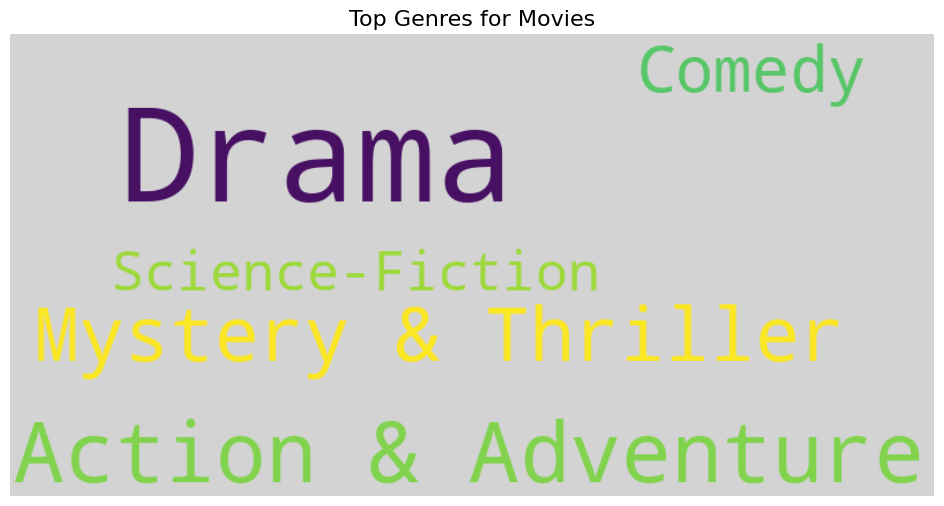

In [ ]:
#Let's Visvalize it using word cloud
# Generate a word cloud for movies
wordcloud_movies = WordCloud(
    width=800,
    height=400,
    background_color='lightgrey',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_movies)

# Plot the word cloud for movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Top Genres for Movies', fontsize=16, color='black')
plt.axis('off')
plt.show()

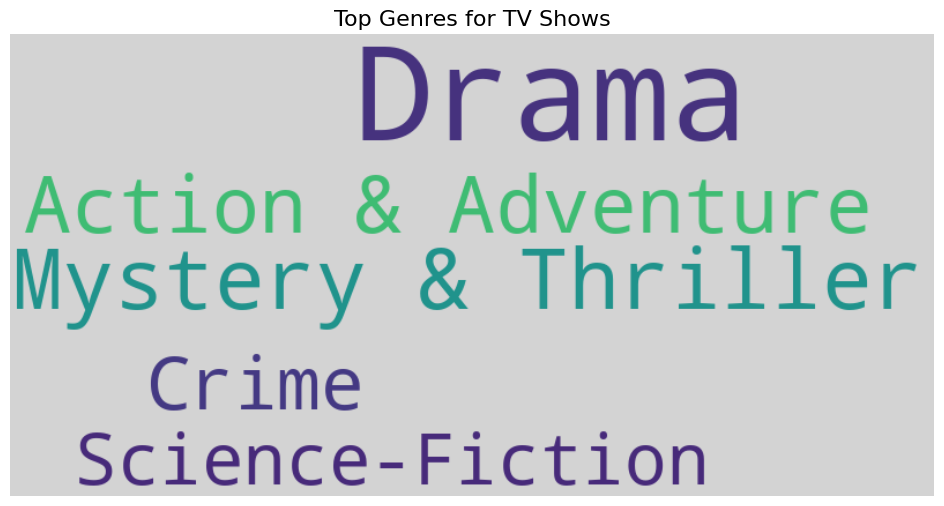

In [ ]:
# Generate a word cloud for TV shows
wordcloud_tv_shows = WordCloud(
    width=800,
    height=400,
    background_color='lightgrey',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_tv)

# Plot the word cloud for TV shows
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud_tv_shows, interpolation='bilinear')
plt.title('Top Genres for TV Shows', fontsize=16, color='black')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
# Streaning services movies
streaming_services_movies = movies_df['streaming_service'].str.split(', ', expand=True).stack().value_counts()

# Filter the series to include only services with a count greater than 2
streaming_services_movies = streaming_services_movies[streaming_services_movies >= 2]

# Streaming services tv shows
streaming_services_tv_shows = tvshows_df['tv_streaming_service'].str.split(', ', expand=True).stack().value_counts()

# Filter the series to include only services with a count greater than 2
streaming_services_tv_shows = streaming_services_tv_shows[streaming_services_tv_shows >= 2]

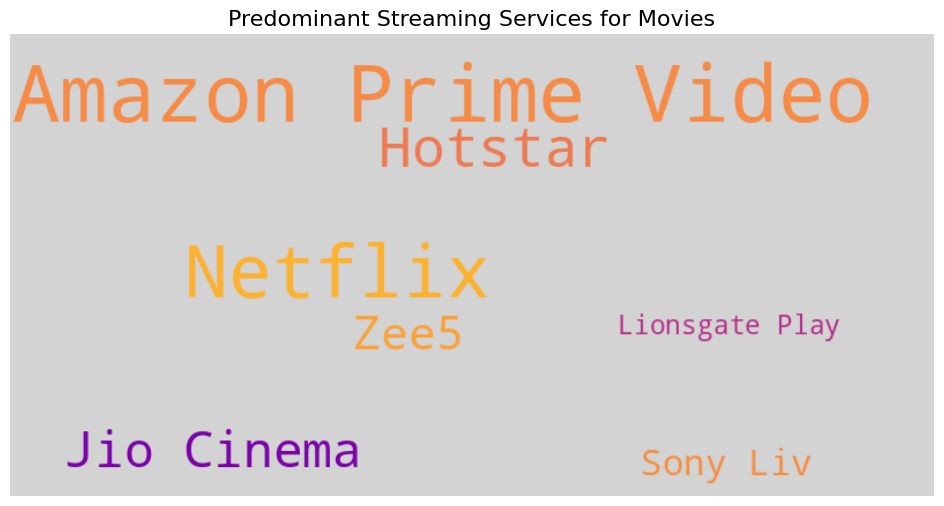

In [ ]:
#Let's Visvalize it using word cloud
# Generate a word cloud for streaming services in movies
wordcloud_movies_services = WordCloud(
    width=800,
    height=400,
    background_color='lightgrey',
    colormap='plasma',
    max_words=100,
    contour_width=3,
    contour_color='orange',
).generate_from_frequencies(streaming_services_movies)

# Plot the word cloud for streaming services in movies
plt.figure(figsize=(16, 6))
plt.imshow(wordcloud_movies_services, interpolation='bilinear')
plt.title('Predominant Streaming Services for Movies', fontsize=16, color='black')
plt.axis('off')
plt.show()

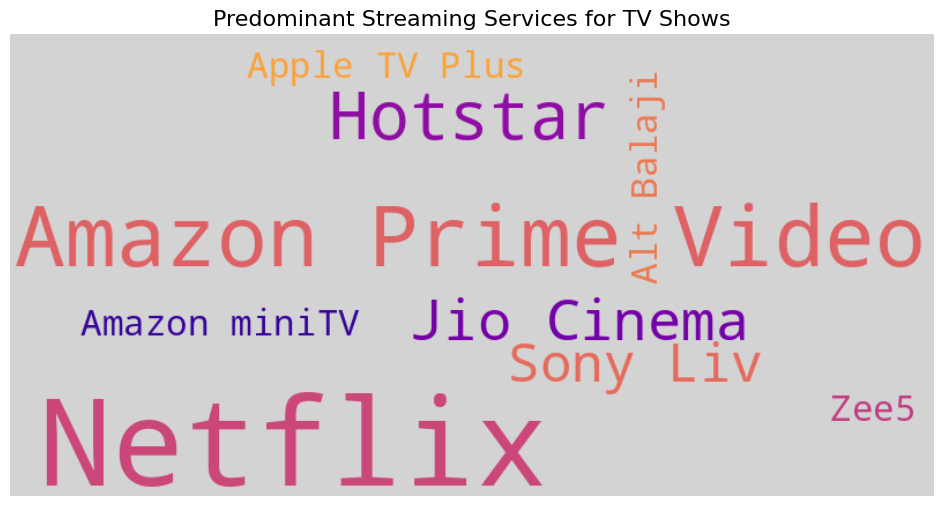

In [ ]:
# Generate a word cloud for streaming services in TV shows
wordcloud_tv_shows_services = WordCloud(
    width=800,
    height=400,
    background_color='lightgrey',
    colormap='plasma',
    max_words=100,
    contour_width=3,
    contour_color='orange',
).generate_from_frequencies(streaming_services_tv_shows)

# Plot the word cloud for streaming services in TV shows
plt.figure(figsize=(16, 6))
plt.imshow(wordcloud_tv_shows_services, interpolation='bilinear')
plt.title('Predominant Streaming Services for TV Shows', fontsize=16, color='black')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format

# Save filtered movies dataframe to CSV
movies_df.to_csv('Final_movies_data.csv', index=False)

# Save filtered TV shows dataframe to CSV
tvshows_df.to_csv('Final_tv_shows_data.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format

# Save filtered movies dataframe to CSV
filterd_movies.to_csv('filtered_movies_data.csv', index=False)

# Save filtered TV shows dataframe to CSV
filterd_tv_shows.to_csv('filtered_tv_shows_data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

https://drive.google.com/drive/folders/1_3bEG7L5ASdjs5OIT0Lojk5eSzbEokq3?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***